In [1041]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [1042]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample_submission = pd.read_csv("./data/sample_submission.csv")

In [1043]:
print(f"training dataset shape: {train.shape}")
print(f"testing dataset shape: {test.shape}")

training dataset shape: (1460, 81)
testing dataset shape: (1459, 80)


In [1044]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1045]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1046]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [1047]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


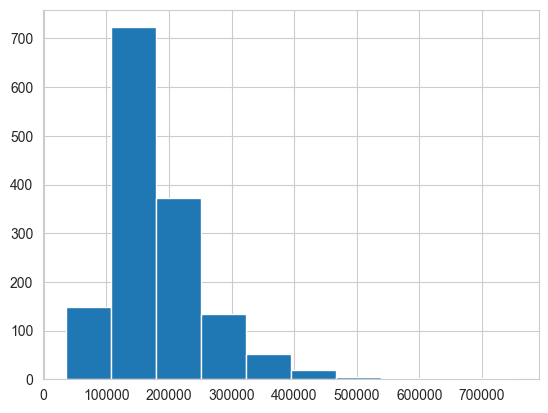

In [1048]:
plt.hist(train["SalePrice"])
plt.show()

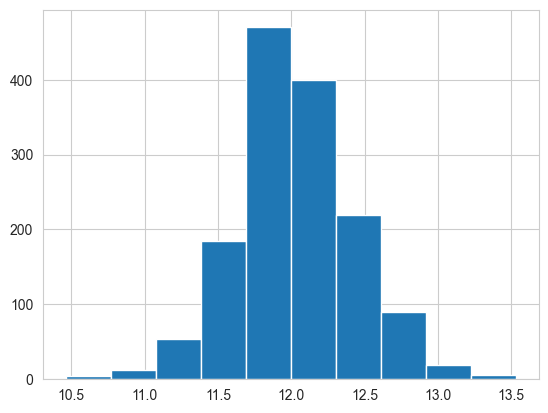

In [1049]:
scaled_price = np.log(train["SalePrice"])
plt.hist(scaled_price)
plt.show()

In [1050]:
numerical = train.select_dtypes(np.number)
numerical.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [1051]:
correlation = numerical.corr()
correlation["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

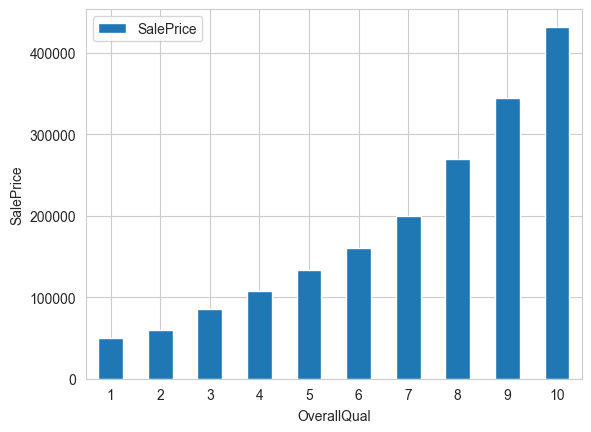

In [1052]:
# OverallQual
qual_pivot = train.pivot_table(index="OverallQual",values="SalePrice", aggfunc=np.median)
qual_pivot.plot(kind="bar")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.xticks(rotation="horizontal")
plt.show()

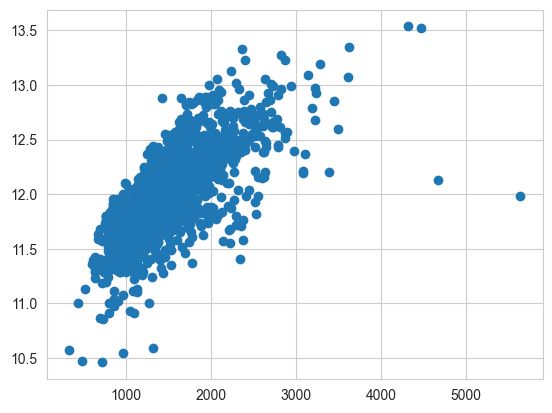

In [1053]:
# GrLivArea
plt.scatter(x=train["GrLivArea"], y=np.log(train["SalePrice"]))
plt.show()

In [1054]:
train = train[train["GrLivArea"] <4500]

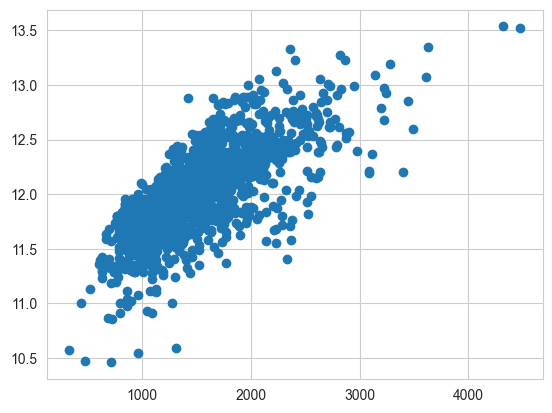

In [1055]:
plt.scatter(x=train["GrLivArea"], y=np.log(train["SalePrice"]))
plt.show()

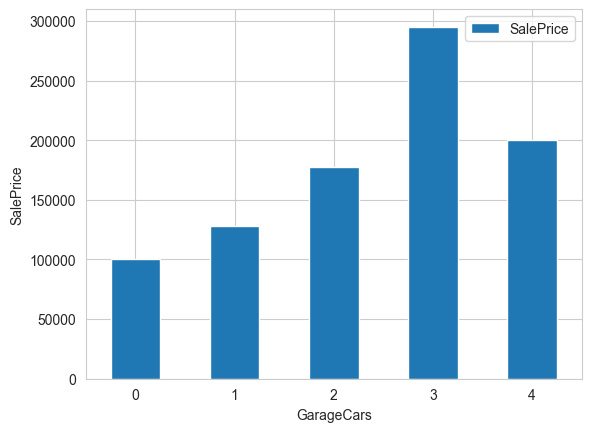

In [1056]:
# GarageCars
qual_pivot = train.pivot_table(index="GarageCars",values="SalePrice", aggfunc=np.median)
qual_pivot.plot(kind="bar")
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.xticks(rotation="horizontal")
plt.show()

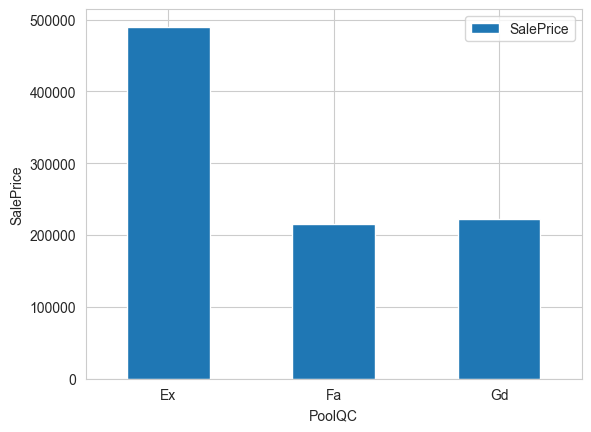

In [1057]:
# PoolQC
qual_pivot = train.pivot_table(index="PoolQC",values="SalePrice", aggfunc=np.median)
qual_pivot.plot(kind="bar")
plt.xlabel("PoolQC")
plt.ylabel("SalePrice")
plt.xticks(rotation="horizontal")
plt.show()

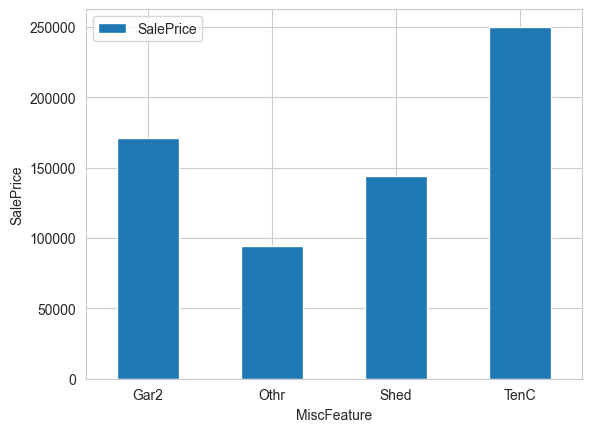

In [1058]:
# MiscFeature
qual_pivot = train.pivot_table(index="MiscFeature",values="SalePrice", aggfunc=np.median)
qual_pivot.plot(kind="bar")
plt.xlabel("MiscFeature")
plt.ylabel("SalePrice")
plt.xticks(rotation="horizontal")
plt.show()

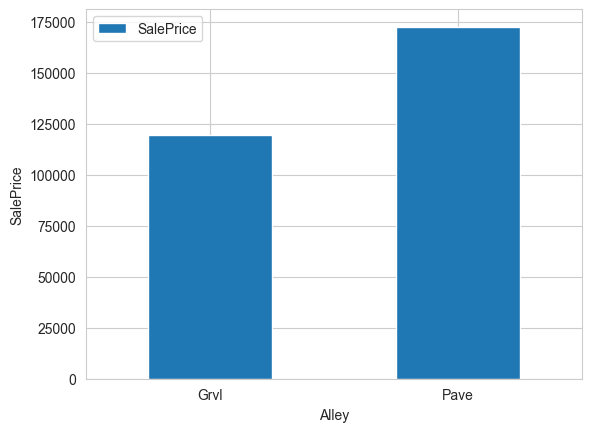

In [1059]:
# Alley
qual_pivot = train.pivot_table(index="Alley",values="SalePrice", aggfunc=np.median)
qual_pivot.plot(kind="bar")
plt.xlabel("Alley")
plt.ylabel("SalePrice")
plt.xticks(rotation="horizontal")
plt.show()

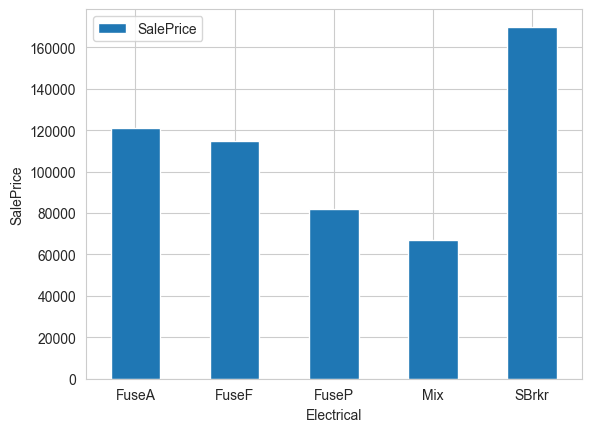

In [1060]:
# Electrical
qual_pivot = train.pivot_table(index="Electrical",values="SalePrice", aggfunc=np.median)
qual_pivot.plot(kind="bar")
plt.xlabel("Electrical")
plt.ylabel("SalePrice")
plt.xticks(rotation="horizontal")
plt.show()

<AxesSubplot: >

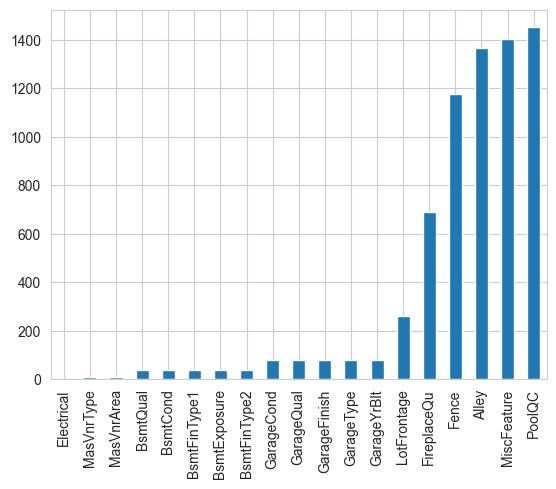

In [1061]:
sns.set_style("whitegrid")
train_null_values = train.isnull().sum()
train_null_values = train_null_values[train_null_values > 0]
train_null_values.sort_values(inplace=True)
train_null_values.plot.bar()

<AxesSubplot: >

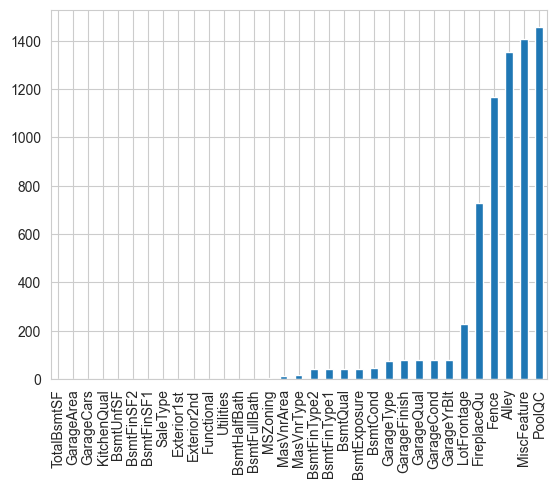

In [1062]:
sns.set_style("whitegrid")
test_null_values = test.isnull().sum()
test_null_values = test_null_values[test_null_values > 0]
test_null_values.sort_values(inplace=True)
test_null_values.plot.bar()

In [1063]:
# for training dataset
qualitative = train.select_dtypes(exclude = np.number)
for column, value in train_null_values.iteritems():
    if column in qualitative:
        print(train[column].unique())

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['No' 'Gd' 'Mn' 'Av' nan]
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['RFn' 'Unf' 'Fin' nan]
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Grvl' 'Pave']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
[nan 'Ex' 'Fa' 'Gd']


In [1064]:
# for testing dataset
qualitative = test.select_dtypes(exclude = np.number)
for column, value in test_null_values.iteritems():
    if column in qualitative:
        print(test[column].unique())

['TA' 'Gd' 'Ex' 'Fa' nan]
['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan]
['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']
['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone']
['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' nan]
['AllPub' nan]
['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]
['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]
['TA' 'Gd' 'Ex' 'Fa' nan]
['No' 'Gd' 'Mn' 'Av' nan]
['TA' 'Po' 'Fa' 'Gd' nan]
['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 'CarPort']
['Unf' 'Fin' 'RFn' nan]
['TA' nan 'Fa' 'Gd' 'Po']
['TA' nan 'Fa' 'Gd' 'Po' 'Ex']
[nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']
['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']
[nan 'Pave' 'Grvl']
[nan 'Gar2' 'Shed' 'Othr']
[nan 'Ex' 'Gd']


In [1065]:
for df in [train, test]:
    for column in qualitative:
        if df.isnull().sum()[column] > 0 and column not in ["Electrical", "MasVnrType"]:
            df[column].fillna("None", inplace=True)

In [1066]:
for df in [train, test]:
    df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)
    df["MasVnrType"].fillna(df["MasVnrType"].mode()[0], inplace=True)

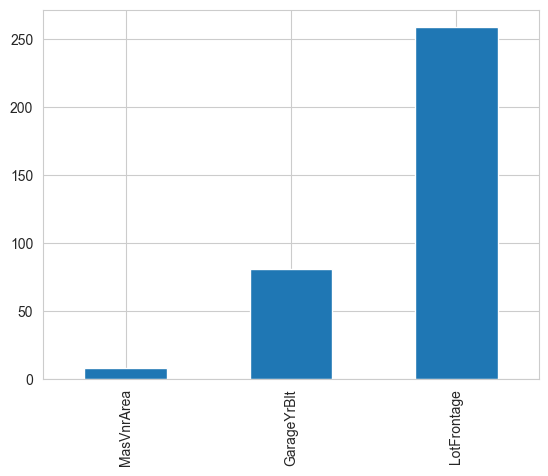

In [1067]:
sns.set_style("whitegrid")
train_null_values = train.isnull().sum()
train_null_values = train_null_values[train_null_values > 0]
train_null_values.sort_values(inplace=True)
train_null_values.plot.bar()
plt.show()

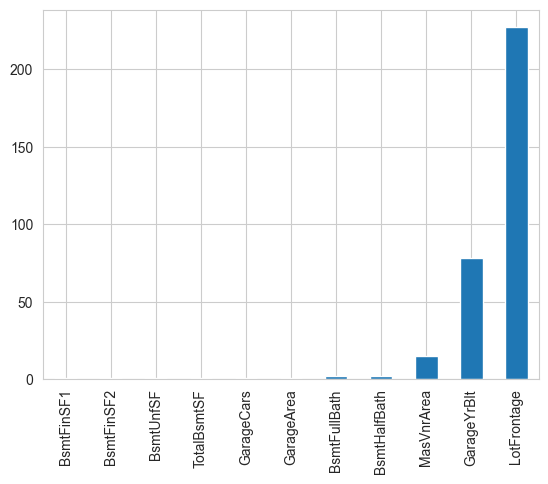

In [1068]:
sns.set_style("whitegrid")
test_null_values = test.isnull().sum()
test_null_values = test_null_values[test_null_values > 0]
test_null_values.sort_values(inplace=True)
test_null_values.plot.bar()
plt.show()

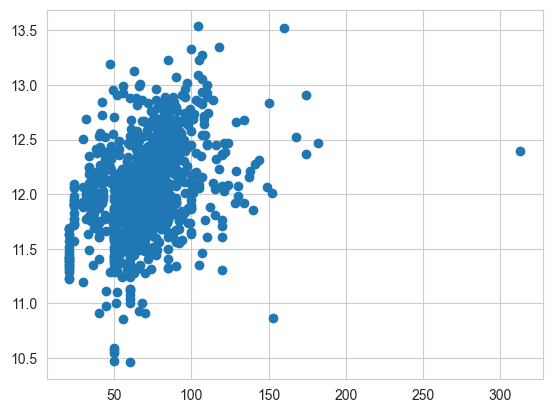

In [1069]:
plt.scatter(x=train["LotFrontage"], y=np.log(train["SalePrice"]))
plt.show()

In [1070]:
train = train[train["LotFrontage"] < 300]

In [1071]:
# Filling in Null vlaues for the training dataset
for column in ["GarageYrBlt", "LotFrontage"]:
    train[column].fillna(train[column].median(), inplace=True)
    
train["MasVnrArea"].fillna(0, inplace=True)
    
# Filling in Null values for the testing dataset
for column in ["BsmtFinSF1", "BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF","GarageYrBlt", "TotalBsmtSF", "GarageCars", "GarageArea", "BsmtFullBath", "BsmtHalfBath","MasVnrArea",]:
    test[column].fillna(0, inplace=True)
    
test["LotFrontage"].fillna(test["LotFrontage"].median(), inplace=True)


In [1072]:
#label encoding
le = LabelEncoder()
for col in qualitative:
    train[col] = le.fit_transform(train[col])
    test[col]= le.fit_transform(test[col])

In [1073]:
numerical.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000


In [1074]:
quantitative_col = list(numerical.columns)

for col in ["Id", "SalePrice", "YrSold", "YearBuilt", "YearRemodAdd","GarageYrBlt"]:
    quantitative_col.remove(col)

In [1075]:
standard_scaler = StandardScaler()


for col in quantitative_col:
    data_val = train[col].values.reshape(-1,1)
    train[col] = standard_scaler.fit_transform(data_val)
    
    
    data_val = test[col].values.reshape(-1,1)
    test[col] = standard_scaler.fit_transform(data_val)

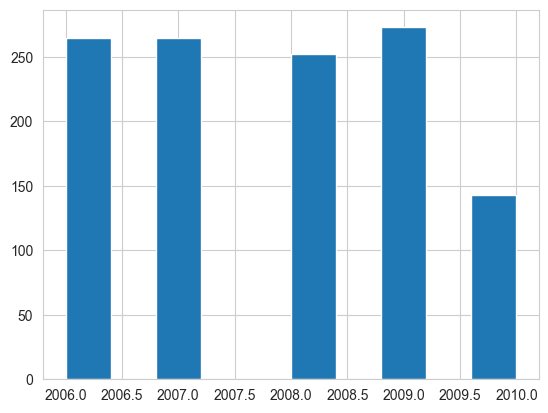

In [1076]:
train["YrSold"].hist()
plt.show()

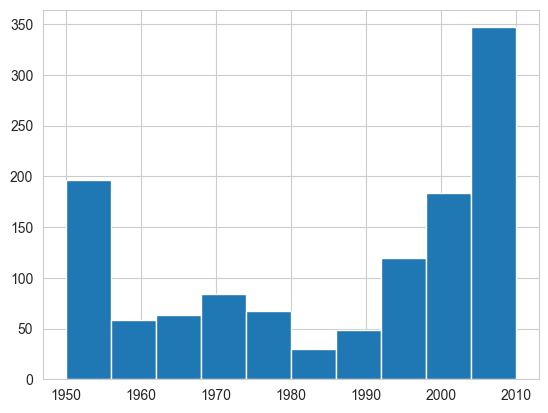

In [1077]:
train["YearRemodAdd"].hist()
plt.show()

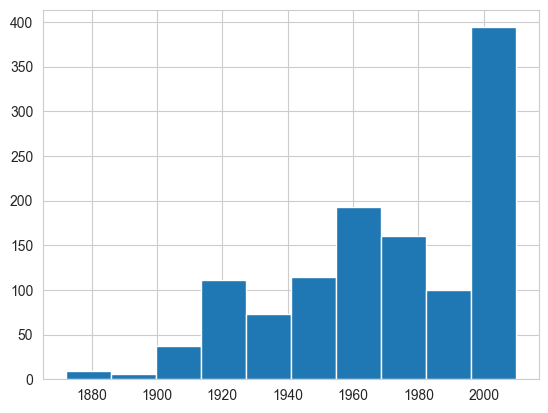

In [1078]:
train["YearBuilt"].hist()
plt.show()

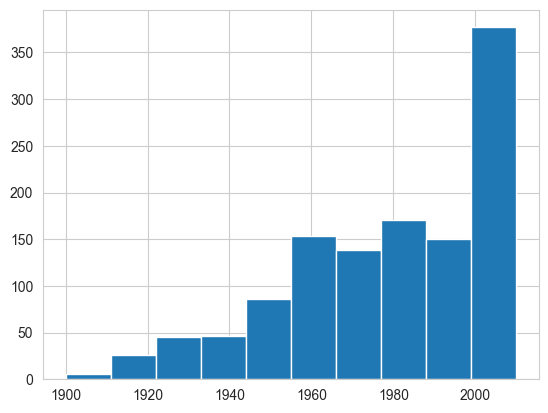

In [1079]:
train["GarageYrBlt"].hist()
plt.show()

In [1080]:
train["YearBuilt"] = pd.cut(train["YearBuilt"], bins=[0, 1870, 1900, 1920, 1940, 1960, 1980, 2000, 2010], labels=[1,2,3,4,5,6,7,8])
train["YearRemodAdd"] = pd.cut(train["YearRemodAdd"], bins=[0, 1950, 1960, 1970, 1980, 1990, 2000, 2010], labels=[1,2,3,4,5,6,7])
train["YrSold"] = pd.cut(train["YrSold"], bins=[0, 2006, 2007, 2008, 2009, 2010],labels=[1,2,3,4,5])
train["GarageYrBlt"] = pd.cut(train["GarageYrBlt"], bins=[0, 1900, 1910, 1920, 1930, 1940, 1950,1960,1970,1980,1990,2000, 2010],labels=[1,2,3,4,5,6,7,8,9,10,11,12])


In [1081]:
test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [1082]:
test["YearBuilt"] = pd.cut(test["YearBuilt"], bins=[0, 1870, 1900, 1920, 1940, 1960, 1980, 2000, 2010], labels=[1,2,3,4,5,6,7,8])
test["YearRemodAdd"] = pd.cut(test["YearRemodAdd"], bins=[0, 1950, 1960, 1970, 1980, 1990, 2000, 2010], labels=[1,2,3,4,5,6,7])
test["YrSold"] = pd.cut(test["YrSold"], bins=[0, 2006, 2007, 2008, 2009, 2010],labels=[1,2,3,4,5])
#test["GarageYrBlt"] = pd.cut(test["GarageYrBlt"], bins=[0, 1900, 1910, 1920, 1930, 1940, 1950,1960,1970,1980,1990,2000, 2010], labels=[1,2,3,4,5,6,7,8,9,10,11,12])


In [1030]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [1031]:
y = train["SalePrice"]
x = train.drop("SalePrice",axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1032]:
# linear regression
lr = LinearRegression().fit(x_train, y_train)
lr.score(x_test, y_test)

0.8603592789101623

In [1033]:
# ridge regression
ridge = Ridge().fit(x_train, y_train)
ridge.score(x_test, y_test)

0.8636822887766518

In [1034]:
# lasso regression
lass = Lasso().fit(x_train, y_train)
lass.score(x_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e+09, tolerance: 6.543e+08
  model = cd_fast.enet_coordinate_descent(


0.860487496871712

In [1035]:
# ElasticNet
elastic = ElasticNet().fit(x_train, y_train)
elastic.score(x_test, y_test)

0.8786970494663882

In [1036]:
# DecisionTreeRegressor
decision = DecisionTreeRegressor().fit(x_train, y_train)
decision.score(x_test, y_test)

0.8146474536225292

In [1037]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [1038]:
test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [1039]:
# Using ElasticNet
prediction = elastic.predict(test.values)

submission = pd.DataFrame({"Id": test["Id"], "SalePrice": prediction})
submission.to_csv("submission.csv", index=False)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


ValueError: Input X contains NaN.
ElasticNet does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [1040]:
test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
